In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df=pd.read_csv("dataframe_final.csv",sep=",")

In [4]:
df.head()

,Any,Mes,Dia,Tram_Horari,Codi_Postal,Valor,temperature_2m,apparent_temperature,rain,wind_speed_10m,is_day,sunshine_duration,direct_radiation,Dia_Setmana,Festiu,Tasa interanual del IPI,dew_point_2m
0,2019,1,1,1,8001,71768.816539,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
1,2019,1,1,1,8002,105525.771005,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
2,2019,1,1,1,8003,109681.449902,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
3,2019,1,1,1,8004,114701.832375,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275
4,2019,1,1,1,8005,117194.598557,6.6275,2.624932,False,14.003028,False,0.0,0.0,2,True,0.23,1.0275


In [ ]:
df_PCA=df[['temperature_2m', 'apparent_temperature','wind_speed_10m','sunshine_duration', 'direct_radiation','dew_point_2m','Valor']]

### Scree Plot (variància explicada acumulada)

Variància explicada per component:
Component 1: 0.5642
Component 2: 0.2753
Component 3: 0.1252
Component 4: 0.0202
Component 5: 0.0149
Component 6: 0.0002


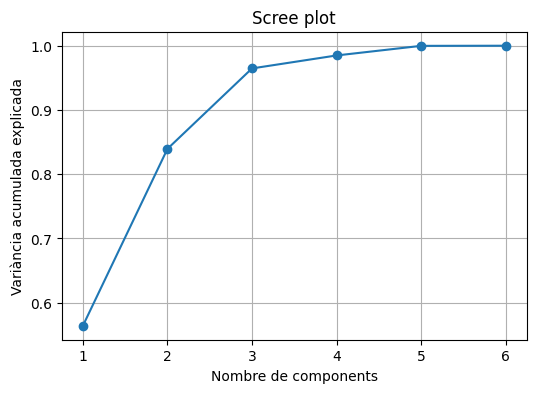

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecciona les variables a PCA (sense la variable resposta 'Valor' si només vols variables predictives)
X = df_PCA.drop(columns=['Valor'])

# Escala les dades (PCA funciona millor amb dades estandarditzades)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplica PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Mostra la variància explicada per cada component
explained_variance = pca.explained_variance_ratio_
print("Variància explicada per component:")
for i, var in enumerate(explained_variance, 1):
    print(f"Component {i}: {var:.4f}")

# Gràfic de la variància acumulada per decidir quantes components retenir
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància acumulada explicada')
plt.title('Scree plot')
plt.grid(True)
plt.show()


### Bi-plot (projecció de les observacions sobre els 2 primers components)

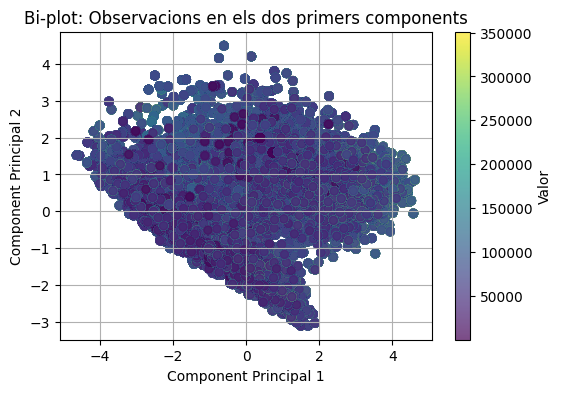

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_PCA['Valor'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Valor')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.title('Bi-plot: Observacions en els dos primers components')
plt.grid(True)
plt.show()

### Loading plot (importància de cada variable en els components)

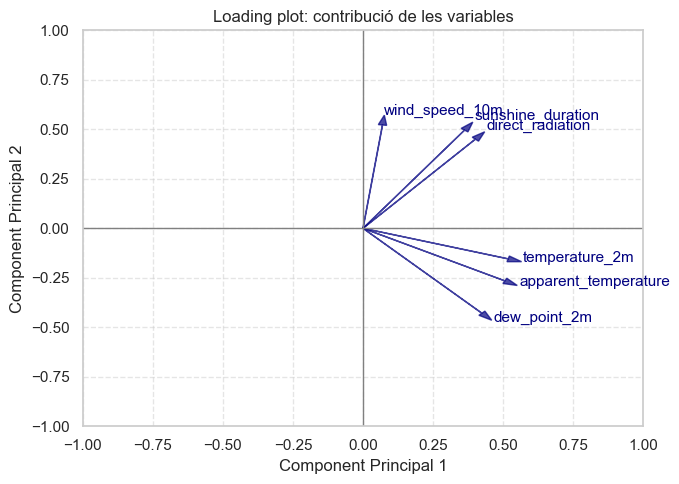

In [25]:
features = X.columns
loadings = pca.components_.T[:, :2]

plt.figure(figsize=(7, 5))

# Dibuixar fletxes (vectors)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='navy', alpha=0.7, head_width=0.03, head_length=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature,
             color='navy', fontsize=11)

plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.title('Loading plot: contribució de les variables')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()




In [21]:
features = X.columns
loadings = pca.components_.T[:, :2]

df_loadings = pd.DataFrame(loadings, index=features, columns=['Component Principal 1', 'Component Principal 2'])

print(df_loadings)


                      Component Principal 1  Component Principal 2
temperature_2m                     0.517592              -0.154501
apparent_temperature               0.505885              -0.265708
wind_speed_10m                     0.069494               0.522045
sunshine_duration                  0.362058               0.496048
direct_radiation                   0.400681               0.450312
dew_point_2m                       0.423933              -0.429130


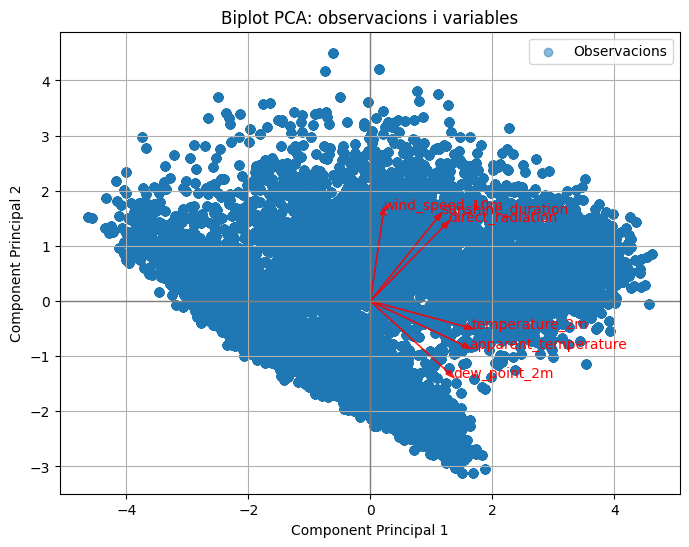

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Suposem que tens:
# X_pca: matriu amb les observacions projectades (scores) en els components principals
# features: nom de les variables
# loadings: càrregues de les variables (components_.T)

plt.figure(figsize=(8, 6))

# Punts (observacions)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label='Observacions')

# Vectors (variables)
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, 
              color='r', alpha=0.8, head_width=0.1)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, feature, color='r')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.title('Biplot PCA: observacions i variables')
plt.grid(True)
plt.legend()
plt.show()
